### ERA5-Land hourly data from 1950 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **ERA5-Land hourly data from 1950 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [ ]:
import earthkit

#### Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [ ]:
temperature = earthkit.data.from_source(
    'cds',
    'derived-era5-land-daily-statistics',
    {
        'variable': ['2m_temperature'],
        'year': '2023',
        'month': '01',
        'day': ['01'],
        'daily_statistic': 'daily_mean',
        'time_zone': 'utc+00:00',
        'frequency': '1_hourly',
    },
)
date_for_plot = '2023-01-01 (UTC)'

2025-05-22 16:24:24,016 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-22 16:24:24,017 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-22 16:24:24,292 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-22 16:24:24,293 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-22 16:24:24,772 WARNING [2025-02-12T00:00:00] Requests for non-consecutive date ranges combined wi

37b0a473b3c05fa19a9d6b4f7d8a0877.nc:   0%|          | 0.00/4.47M [00:00<?, ?B/s]

#### Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [3]:
temperature_style = earthkit.plots.styles.Style(
    colors="turbo",
    levels=range(-40, 41, 2),
    extend="both",
    units="celsius",
)

We also choose the projection to plot in, we are using *Nearside Perspective* projection from *cartopy*.

In [4]:
import cartopy.crs as ccrs
crs = ccrs.NearsidePerspective(central_latitude=50)

Now we can produce our plot, using the style and projection we just defined.

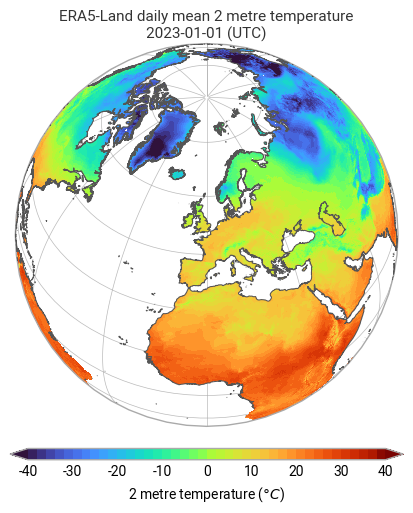

In [11]:
earthkit.plots.schema.figure.set(figsize=(5, 5))

chart = earthkit.plots.Map(crs=crs)

chart.gridlines(xstep=30, ystep=15, zorder=1, draw_labels=False, color='darkgrey')
chart.ocean(zorder=0, color="lightgrey")

chart.pcolormesh(temperature, style=temperature_style, zorder=2)

chart.coastlines(resolution="high", zorder=3)

chart.legend(location="bottom")

# For the title, we can take advantage of earthkit-plots metadata
# detection, which allows us to use format keys like 'variable_name'
chart.title(
    "ERA5-Land daily mean {variable_name}\n" + date_for_plot,
    fontsize=11,
)

chart.figure.save("overview-detail.png")

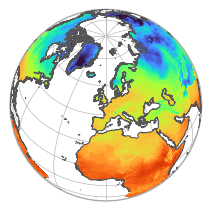

In [ ]:
earthkit.plots.schema.figure.set(figsize=(2, 2))
chart = earthkit.plots.Map(crs=crs)

chart.gridlines(
    xstep=30, ystep=15, zorder=1,
    draw_labels=False, color='darkgrey'
)
chart.ocean(color="lightgrey")

chart.pcolormesh(temperature, style=temperature_style, zorder=2)

chart.coastlines(resolution="high", zorder=3)

chart.figure.save("overview.png")